In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image #conda install pillow also works

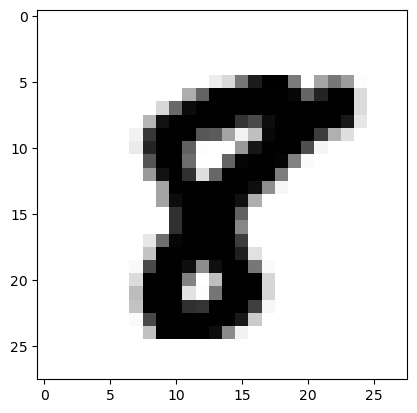

In [9]:
im = Image.open("mnist_train/1.png")
plt.imshow(im, cmap = "binary")

In [11]:
import numpy as np

im_array = np.array(im)
print("Array Dimensions", im_array.shape)
print(im_array)

Array Dimensions (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1  18  38 136 227 255
  254 132   0  90 136  98   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  82 156 253 253 253 253 253
  253 249 154 219 253 253  35   0   0   0]
 [  0   0   0   0   0   0   0   0   0  40 150 244 253 253 253 253 253 253
  253 253 253 253 253 253  35   0   0   0]
 [  0   0   0   0   0   0   0   0  74 

In [16]:
import pandas as pd
df_train = pd.read_csv("mnist_train.csv")
print(df_train.shape)
df_train.head()


(256, 2)


,Class Label,File Name
0,5,0.png
1,8,1.png
2,8,2.png
3,0,3.png
4,9,4.png


# **Custom Dataset Class**

In [17]:
import torch
from torch.utils.data import Dataset
import os

class MyDataset(Dataset): #class inheritance
    def __init__(self, csv_path, img_dir, transform = None):

        df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.img_names = df["File Name"]
        self.y = df["Class Label"]
        self.transform = transform

    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.img_dir,self.img_names[idx]))
        if self.transform is not None:
            img = self.transform(img)
        
        label = self.y[idx]
        return img, label

    def __len__(self):
        return self.y.shape[0]




        


# **Custom DataLoader**

In [21]:
from torchvision import transforms
from torch.utils.data import DataLoader

# note that transform.ToTensor()
# already divides pixedl by 255 internally

custom_transform = transforms.Compose([transforms.ToTensor()])

In [37]:
train_dataset = MyDataset(csv_path = "mnist_train.csv",
                          img_dir="mnist_train",
                        transform = custom_transform)

train_loader = DataLoader(dataset = train_dataset,
                           batch_size = 32,
                           drop_last = True, #drops last batch if not large enough
                           shuffle = True,
                           num_workers = 0) #number of processes/CPUs to use                           ) 



In [38]:
valid_dataset = MyDataset(csv_path = "mnist_valid.csv",
                          img_dir="mnist_valid",
                        transform = custom_transform)

valid_loader = DataLoader(dataset = train_dataset,
                           batch_size = 100,
                           drop_last = True, #drops last batch if not large enough
                           shuffle = True,
                           num_workers = 0) #number of processes/CPUs to use          

In [39]:
test_dataset = MyDataset(csv_path = "mnist_test.csv",
                          img_dir="mnist_test",
                        transform = custom_transform)

test_loader = DataLoader(dataset = train_dataset,
                           batch_size = 100, #can be the full size of the test dataset
                           drop_last = True, #drops last batch if not large enough
                           shuffle = True,
                           num_workers = 0) #number of processes/CPUs to use    

# Iterate through dataset to chet it works 

In [40]:
torch.manual_seed(0)

num_epochs = 2
for epoch in range(num_epochs):
    for batch_idx, (x,y) in enumerate(train_loader):

        print("epoch:",epoch + 1, end = "") #end stops it from going to a new line
        print(" | batch index:", batch_idx, end = "")
        print(" | Batch size:", y.size()[0])

epoch: 1 | batch index: 0 | Batch size: 32
epoch: 1 | batch index: 1 | Batch size: 32
epoch: 1 | batch index: 2 | Batch size: 32
epoch: 1 | batch index: 3 | Batch size: 32
epoch: 1 | batch index: 4 | Batch size: 32
epoch: 1 | batch index: 5 | Batch size: 32
epoch: 1 | batch index: 6 | Batch size: 32
epoch: 1 | batch index: 7 | Batch size: 32
epoch: 2 | batch index: 0 | Batch size: 32
epoch: 2 | batch index: 1 | Batch size: 32
epoch: 2 | batch index: 2 | Batch size: 32
epoch: 2 | batch index: 3 | Batch size: 32
epoch: 2 | batch index: 4 | Batch size: 32
epoch: 2 | batch index: 5 | Batch size: 32
epoch: 2 | batch index: 6 | Batch size: 32
epoch: 2 | batch index: 7 | Batch size: 32


In [44]:
print(x.shape)
x_image_as_vector = x.view(-1, 28*28)
print(x_image_as_vector.shape)



torch.Size([32, 1, 28, 28])
torch.Size([32, 784])
